# Understanding Principal Component Analysis (PCA)

The purpose of this post is to give the reader detailed understanding of Principal Component Analysis with the necessary mathematical proofs. 

In real world data analysis tasks we analyze complex data i.e. multi dimensional data. We plot the data and find various patterns in it or use it to train some machine learning models. 

As the dimensions of data increases, the difficulty to visualize it and perform computations on it also increases. So, how to reduce the dimensions of a data-
* Remove the redundant dimensions
* Only keep the most important dimensions

## Table of content

* [1. What is PCA?](#1.-What-is-PCA?)
* [2. Some mathematical terms](#2.-Some-mathematical-terms)
  * [2.1 Variance](#2.1-Variance)
  * [2.2 Covariance](#2.2-Covariance)
* [3. How PCA works?](#3.-How-PCA-works?)
  * [3.1 Loading the dataset](#3.1-Loading-the-dataset)
  * [3.2 Calculating the covariance matrix](#3.2-Calculating-the-covariance-matrix)
    * [3.2.1 Calculating covariance matrix for Iris dataset](#3.2.1-Calculating-covariance-matrix-for-Iris-dataset)
  * [3.3 Calculate eigen vectors and corresponding eigen values.](#3.3-Calculate-eigen-vectors-and-corresponding-eigen-values.)
  * [3.4 Sort the eigen vectors according to their eigen values in decreasing order.](#3.4-Sort-the-eigen-vectors-according-to-their-eigen-values-in-decreasing-order.)
  * [3.5 Choose first k Eigen vectors and that will be the new k dimensions.](#3.5-Choose-first-k-Eigen-vectors-and-that-will-be-the-new-k-dimensions.)
  * [3.6 Transform the original n dimensional data points into k dimensions.](#3.6-Transform-the-original-n-dimensional-data-points-into-k-dimensions.)
* [4. Some derivations](#4.-Some-derivations)
  * [Theorem-1](#Theorem-1)
  * [Theorem-2](#Theorem-2)
  * [4.1 Inverse Transform](#4.1-Inverse-Transform)
  * [4.1.1 Finding approx. original dataset](#4.1.1-Finding-approx.-original-dataset)
* [5. Reference](#5.-Reference)

## 1. What is PCA?

PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle
axis occurs first. (more important = more variance/more spread out data)

## 2. Some mathematical terms

### 2.1 Variance

**Variance :** It is a measure of the variability or it simply measures how spread the data set is. Mathematically, it is the average squared deviation from the mean score. We use the following formula to compute variance var(x).
$$ var (x) = \frac{\sum(x_i - \mu_x)^2}{N} $$
where $\mu_x$ is the mean of the set of values $x_i$ and $N$ is total number of values.

### 2.2 Covariance

**Covariance :** It is a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. Formula is shown below denoted by cov(x,y) as the covariance of x and y.
$$ cov(x,y)=\frac{\sum(x_i-\mu_x)(y_i-\mu_y)}{N} $$
where $\mu_x$ and $\mu_y$ are means values of $x_i$ and $y_i$ respectively, each having $N$ elements.

One way to observe the covariance is how interrelated two data sets are.

![](covariance_image.png)

Positive covariance means X and Y are positively related i.e. as X increases Y also increases. Negative covariance depicts the exact opposite relation. However zero covariance means X and Y are not related.

Now lets think about the requirement of data analysis.
Since we try to find the patterns among the data sets so we want the data to be spread out across each dimension. Also, we want the dimensions to be independent. Such that if data has high covariance when represented in some n number of dimensions then we replace those dimensions with linear combination of those n dimensions. Now that data will only be dependent on linear combination of those related n dimensions.

## 3. How PCA works?

How does PCA work -

1. Load the dataset
1. Calculate the covariance matrix `cov_x` of data points.
1. Calculate eigen vectors and corresponding eigen values.
1. Sort the eigen vectors according to their eigen values in decreasing order.
1. Choose first k eigen vectors and that will be the new k dimensions.
1. Transform the original n dimensional data points into k dimensions.

### 3.1 Loading the dataset

We are going to use **Iris dataset**, to visualise PCA

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
df=pd.read_csv('iris_data.csv',names=[1,2,3,4,5])
# Storing the shape of the dataset
m,n=df.shape
# 'x' contain all the feature values
x=df[[1,2,3,4]].values
# Creating the label map
label_map={ind:val for ind,val in zip(range(3),df[5].unique())}
# 'y' contains all the label mapping to corresponding numbers
y=np.zeros((m,1),dtype=np.uint8)
for ind,val in label_map.items():
    y[df[5]==val]=ind
# Displaying the dataset
df.head()

,1,2,3,4,5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3.2 Calculating the covariance matrix

Assuming we have the knowledge of variance and covariance, Lets look into what a **Covariance matrix** is.

Let $C_x$ covariance matrix of some data set in 4 dimensions a,b,c,d.   
$V_a$ : variance along dimension a.  
$C_{a,b}$ : Covariance along dimension a and b.

Then $C_x$ is defined as:
$$ C_x= 
\begin{bmatrix}
V_a &C_{a,b} &C_{a,c} &C_{a,d} \\
C_{b,a} &V_b &C_{b,c} &C_{b,d} \\
C_{c,a} &C_{c,b} &V_c &C_{c,d} \\
C_{d,a} &C_{d,b} &C_{d,c} &V_d
\end{bmatrix}
$$

If we have a matrix X of (m,n) dimension such that it holds m data points of n dimensions, then covariance matrix can be calculated as:

$$ C_x= \frac{1}{N}(X-\bar{X})(X-\bar{X})^T $$

It is important to note that the covariance matrix contains -
* variance of dimensions as the main diagonal elements.
* covariance of dimensions as the off diagonal elements.
* covariance matrix is symmetric.

As, we discussed earlier we want the data to be spread out i.e. it should have high variance along dimensions. Also we want to remove correlated dimensions i.e. covariance among the dimensions should be zero (they should be linearly independent). Therefore, our covariance matrix should have -
* large numbers as the main diagonal elements.
* zero values as the off diagonal elements.
We call it a diagonal matrix.

So, we have to transform the original data points such that their covariance is a diagonal matrix. The process of transforming a matrix to diagonal matrix is called **diagonalization.**

#### 3.2.1 Calculating covariance matrix for Iris dataset

In [50]:
# Feature scaling
m,n=x.shape
for i in range(n):
    mean=(1/m)*x[:,i].sum()
    variance=(1/m)*((x[:,i]-mean)**2).sum()
    x[:,i]=(x[:,i]-mean)/variance
# After feature scaling the dataset is 0 mean
for i in range(n):
    print('mean of feature {} is {}'.format(i,(1/m)*x[:,i].sum()))
# Calculating the covariance matrix
cov=(1/m)*np.dot(x.T,x)
print('Covariance martix is:\n{}'.format(cov))

mean of feature 0 is -4.736951571734001e-16
mean of feature 1 is -1.5158245029548805e-15
mean of feature 2 is 4.7369515717340015e-17
mean of feature 3 is -9.473903143468003e-17
Covariance martix is:
[[ 1.46816528 -0.30665611  0.60066444  1.30302466]
 [-0.30665611  5.35473323 -0.55335261 -1.08472247]
 [ 0.60066444 -0.55335261  0.32337083  0.71978638]
 [ 1.30302466 -1.08472247  0.71978638  1.72851418]]


Lets try to understand what I mean by projection error. Suppose we have to transform a 2 dimensional representation of data points to a one dimensional representation. So we will basically try to find a straight line and project data points on them. (A straight line is one dimensional). There are many possibilities to select the straight line. Lets see two such possibilities -

![](finding_axis1.png)
![](finding_axis2.png)

If you see the red lines (connecting the projection of blue points on magenta line) i.e. the perpendicular distance of each data point from the straight line is the projection error. Sum of the error of all data points will be the total projection error.

Clearly, Second choice of straight line is better because -
* The projection error is less than that in the first case.
* Newly projected red points are more widely spread out than the first case. i.e. more variance.

### 3.3 Calculate eigen vectors and corresponding eigen values.

To calculate eigenvalues and eigenvectors we use `np.linalg.eig()` function.

In [51]:
eig_val,eig_vect=np.linalg.eig(cov)
print('Eigen values are:\n {}'.format(eig_val))
print('Eigen vectors are:\n {}'.format(eig_vect))

Eigen values are:
 [ 5.88698949  2.74141181  0.23702845  0.00935377]
Eigen vectors are:
 [[-0.17921219  0.64902732  0.72356116  0.15200583]
 [ 0.9171719   0.38189383 -0.10759758 -0.03708883]
 [-0.15219391  0.25445129 -0.06577843 -0.95276689]
 [-0.32173859  0.60677441 -0.67864218  0.26029578]]


### 3.4 Sort the eigen vectors according to their eigen values in decreasing order.

From the above list of eigen values we see that they are already sorted in decreasing order of magnitude.

### 3.5 Choose first k Eigen vectors and that will be the new k dimensions.

The first 2 eigen values comparable, and remaining 2 eigen values have smaller values and thus can be neglected. So, we select first 2 eigenvectors corresponding to those large eigenvalues.

### 3.6 Transform the original n dimensional data points into k dimensions.

The matrix of eigenvectors is the transformation matrix, with which we matrix multiply dataset to obtain transformed dataset and among the transformed dataset with n=4 features, we select first k=2 features.

Shape of transformed dataset is: (150, 4)


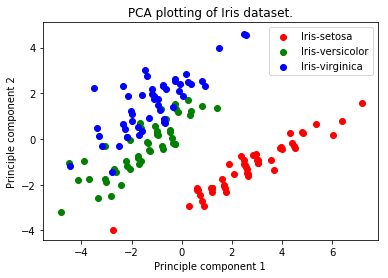

In [54]:
transformed=np.dot(x,eig_vect)
print('Shape of transformed dataset is: {}'.format(transformed.shape))
# Plotting first k=2 features
color={0:'r',1:'g',2:'b'}
for ind,val in color.items():
    data_pts=transformed[np.where(y==ind)[0]]
    plt.scatter(data_pts[:,0],data_pts[:,1],c=val,label=label_map[ind])
plt.legend()
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.title('PCA plotting of Iris dataset.')
plt.show()

## 4. Some derivations

Now we want to transform the original data points such that the covariance matrix of transformed data points is a diagonal matrix. How to do that ?  
$C_x=$covariance matrix of original dataset $X$.  
$C_y=$covariance matrix of transformed dataset $Y$.  
such that, $Y=PX$.  

For simplicity, we discard the mean term and assume the data to be centered, i.e, $X=(X-\bar{X})$
So,
$$
\begin{eqnarray}
C_x=& \frac{1}{N}XX^T \\
C_y=& \frac{1}{N}YY^T \\
=& \frac{1}{N}(PX)(PX)^T \\
=& \frac{1}{N}PXX^TP^T \\
=& P(\frac{1}{N}XX^T)P^T \\
=& PC_xP^T \\
\end{eqnarray}
$$

Here’s the trick- If we find the matrix of eigen vectors of Cx and use that as P (P is used for transforming X to Y, see the image above) , then Cy (covariance of transformed points) will be a diagonal matrix. Hence Y will be the set of new/transformed data points.
Now, if we want to transform points to k dimensions then we will select first k eigen vectors of the matrix Cx (sorted decreasingly according to eigen values) and form a matrix with them and use them as P.

>So, if we have m dimensional original n data points then
$$
X : m*n \\
P : k*m \\
Y = PX : (k*m)(m*n) = (k*n)
$$
Hence, our new transformed matrix has n data points having k dimensions.

### Theorem-1

**The inverse of an orthogonal matrix is its transpose.**

**Proof:**
For orthogonal matrix,
$$
A^TA=I \\
A^{-1}=A^T \\
$$

### Theorem-2

**Let A be a real symmetric matrix and $\lambda_1,\lambda_2,\dots,\lambda_k$ be distinct eigenvalues of A. 
Let $u_i \in R^n$ be non zero eigenvectors such that, $1\leq i\leq k$.   
Then ${u_1,u_2,\dots,u_k}$ forms an orthonormal set.**

**Proof:**
For $i \neq j$, $1 \leq i,j \leq k$, since $A^T=A$, we have:
$$
\begin{eqnarray}
\lambda_i*u_iu_j^T=(\lambda_i*u_i)u_j^T
=(Au_i)u_j^T=u_i(A^Tu_j^T)=u_i(Au_j^T)=\lambda_j*u_iu_j^T
\end{eqnarray}
$$

Since, $i \neq j$, we have $\lambda_i \neq \lambda_j$ and hence, $u_iu_j^T=0$

### 4.1 Inverse Transform

Inverse transform is done to retrive the approximated version of original dataset. Since, we know $Y=PX$ so we can find X axxording to $X=P^{-1}Y$. Given that P is a square matrix. Also since `P` is the transformation matrix consist of all eigenvectors, so it is orthogonal (according to [Theorem-2](#Theorem-2)). So inverse of $P$ is $P^{-1}=P^T$ (according to [Theorem-1](#Theorem-1)).

### 4.1.1 Finding approx. original dataset

In [55]:
# Original dataset approx
approx=np.dot(transformed,eig_vect.T)
print('Actual dataset looks like:\n')
print(x[:5,:])
print('Approximated dataset looks like:\n')
print(approx[:5,:])

Actual dataset looks like:

[[-1.09133619  2.38821102 -0.762724   -1.7262095 ]
 [-1.38496925 -0.28915559 -0.762724   -1.7262095 ]
 [-1.67860231  0.78179105 -0.79506108 -1.7262095 ]
 [-1.82541883  0.24631773 -0.73038691 -1.7262095 ]
 [-1.23815272  2.92368434 -0.762724   -1.7262095 ]]
Approximated dataset looks like:

[[-1.09133619  2.38821102 -0.762724   -1.7262095 ]
 [-1.38496925 -0.28915559 -0.762724   -1.7262095 ]
 [-1.67860231  0.78179105 -0.79506108 -1.7262095 ]
 [-1.82541883  0.24631773 -0.73038691 -1.7262095 ]
 [-1.23815272  2.92368434 -0.762724   -1.7262095 ]]


## 5. Reference

[Link to PCA by medium.com](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0)